# Momento flexionante de viga

### Adrian Padilla Villanueva
### Victor Manuel Vidal Fernandez


# Objetivo

    En este proyecto veremos el comportamiento de una viga de 10 metros de longitud, cuando es sometida a diferentes esfuerzos, todo esto mediante un modelo matematico.
    
    
Supondremos que la viga ocupa el intervalo x∈[0,L] y denotamos el desplazamiento vertical de su eje por y(x). Para desplazamientos pequeños, y(x) satisface la ecuación de la curva elástica que proviene del equilibrio de momentos:

$$
y"=\frac{M(x)}{EI(x)}
$$

Donde E es el módulo de elasticidad lineal (o módulo de Young) que depende de las propiedades elásticas del material, y que supondremos constante, mientras que I(x) es el momento de inercia de la sección transversal respecto al centro la cual se representa como:

$$
I=\frac{1}{12}ba^3
$$

La función M(x) se conoce como momento flector y representa el momento de las fuerzas aplicadas sobre la viga. 

$$
M(x)=\frac{L}{2}- Ix-\frac{L}{2}I
$$

DATOS:

$$
E= 5*10^4
$$

$$
a=0.6, b=0.3
$$

Donde a es la altura de la viga y b es el ancho

Condiciones de contorno

$$
y(0)=0
$$

$$
y(L)=0
$$

Condiciones de inicio

$$
y(0)=0
$$

$$
y"(0)=5*10^-3
$$

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import newton

In [2]:
def f(y,x):
    return np.array([y[1], M(x) / (E*I(x))])

In [3]:
L = 10
E = 5e4
a = 0.6
b = 0.3

x = np.linspace(0, L, num=50)

def I(x):
    return b*a**3/12
def M(x):
    return L/2-np.abs(x-L/2)

Probamos la solucion con las condiciones iniciales

In [4]:
odeint?

In [5]:
yp0 = 5e-3

y0 = np.array([0, yp0])

sol = odeint(f, y0, x)

sol

array([[0.        , 0.005     ],
       [0.00102567, 0.00507713],
       [0.0020828 , 0.00530851],
       [0.0032029 , 0.00569416],
       [0.00441744, 0.00623405],
       [0.00575791, 0.00692821],
       [0.00725578, 0.00777662],
       [0.00894253, 0.00877929],
       [0.01084965, 0.00993621],
       [0.01300862, 0.0112474 ],
       [0.01545092, 0.01271284],
       [0.01820803, 0.01433253],
       [0.02131143, 0.01610648],
       [0.0247926 , 0.01803469],
       [0.02868302, 0.02011716],
       [0.03301418, 0.02235388],
       [0.03781755, 0.02474486],
       [0.04312461, 0.0272901 ],
       [0.04896686, 0.02998959],
       [0.05537576, 0.03284334],
       [0.06238279, 0.03585134],
       [0.07001945, 0.03901361],
       [0.07831721, 0.04233012],
       [0.08730755, 0.0458009 ],
       [0.09702195, 0.04942593],
       [0.10749059, 0.05316666],
       [0.11871345, 0.05679169],
       [0.13066037, 0.06026247],
       [0.14329988, 0.06357899],
       [0.15660049, 0.06674125],
       [0.

array([0.51296298, 0.09759259])

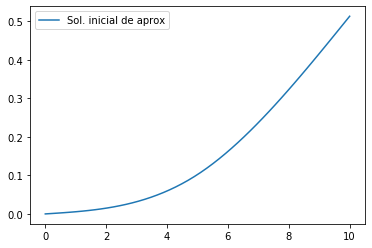

In [6]:
plt.plot(x,sol[:,0], label="Sol. inicial de aprox")
plt.legend()
sol[-1,:]

In [7]:
def viga_biap(yp0):
    y0 = np.array([0, yp0])
    sol = odeint(f, y0, x)
    return sol[-1, 0]
viga_biap(5e-3)


0.5129629801243984

In [9]:
yp0 = newton(viga_biap, 5e-2)

In [10]:
y0 = np.array([0, yp0])

[[ 0.00000000e+00 -4.62962874e-02]
 [-9.44296136e-03 -4.62191590e-02]
 [-1.88544555e-02 -4.59877739e-02]
 [-2.82029877e-02 -4.56021322e-02]
 [-3.74570770e-02 -4.50622337e-02]
 [-4.65852425e-02 -4.43680784e-02]
 [-5.55560031e-02 -4.35196665e-02]
 [-6.43378780e-02 -4.25169979e-02]
 [-7.28993861e-02 -4.13600725e-02]
 [-8.12090466e-02 -4.00488904e-02]
 [-8.92353784e-02 -3.85834517e-02]
 [-9.69469006e-02 -3.69637562e-02]
 [-1.04312132e-01 -3.51898040e-02]
 [-1.11299592e-01 -3.32615950e-02]
 [-1.17877800e-01 -3.11791294e-02]
 [-1.24015274e-01 -2.89424070e-02]
 [-1.29680533e-01 -2.65514280e-02]
 [-1.34842098e-01 -2.40061922e-02]
 [-1.39468486e-01 -2.13066997e-02]
 [-1.43528216e-01 -1.84529505e-02]
 [-1.46989808e-01 -1.54449446e-02]
 [-1.49821781e-01 -1.22826819e-02]
 [-1.51992654e-01 -8.96616257e-03]
 [-1.53470946e-01 -5.49538651e-03]
 [-1.54225176e-01 -1.87035373e-03]
 [-1.54225168e-01  1.87034936e-03]
 [-1.53470939e-01  5.49538214e-03]
 [-1.51992648e-01  8.96615820e-03]
 [-1.49821776e-01  1

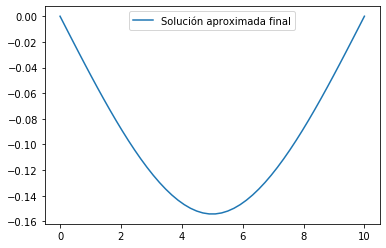

In [12]:
sol = odeint(f, y0, x)
print(sol)
# Plot
plt.plot(x, sol[:, 0], label='Solución aproximada final')
plt.legend()

# El valor de la deflexión máxima es -0.15 que como podemos observar en la gráfica, se produce en el centro de vano.